#### Libraries

In [1]:
import pandas as pd
import datetime as dt
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from utilities import *
import plotly

#### Threshold test

In [31]:
# Load data
stops = pd.read_csv('opp-stops_state.csv')

In [32]:
stops.dropna().state.unique()

array(['CT', 'IL', 'NC', 'RI', 'SC', 'TX', 'WA', 'WI'], dtype=object)

In [33]:
partisanship =  {'CT':'Democrats', 'IL':'Democrats', 'NC':None, 'RI':None, 'SC':'Republicans',
                 'TX':'Republicans', 'WA':'Democrats', 'WI':None}

In [34]:
# Eliminate all NaN rows
stops = stops[stops.search_rate.notnull()]

# Add the number of searches
stops['searches'] = stops['search_rate']*stops['stops_per_year']

# Add partisanship (partisanship of a county is defined by it's state partisanship)
stops['partisanship'] = [partisanship[state] for state in stops.state]

# Again, eliminate states for which we could not define a concrete state affiliation
stops = stops[stops.partisanship.notnull()]

In [35]:
# To easily manage the plots with seaborn, first create one dataFrame with different columns for each race
# DataFrames white/black/hispanic
dfs = []
races = ['white', 'black', 'hispanic']
for race in races:
    df = stops[stops.subject_race==race]
    df.drop('subject_race', 1, inplace=True) # all subjects are of the same race, so no need for this column
    dfs.append(df)

# Rename the columns to dissociate them by race
initial_names = ['search_rate', 'stop_rate', 'hit_rate', 'inferred_threshold',
                 'stops_per_year', 'stop_rate_n', 'searches']
for name in initial_names:
    dfs[0].rename(columns = {name:name+'_white'}, inplace=True)
    dfs[1].rename(columns = {name:name+'_black'}, inplace=True)
    dfs[2].rename(columns = {name:name+'_hispanic'}, inplace=True)

# Merge the columns in one dataFrame
df_final = pd.merge(dfs[0], dfs[1], on=['state','city', 'geography', 'subgeography', 'partisanship'])
df_final = pd.merge(df_final, dfs[2], on=['state','city', 'geography', 'subgeography', 'partisanship'])

# The plots also need the number of searches per county
df_final['total_searches'] = df_final['searches_white']+df_final['searches_black']+df_final['searches_hispanic']

/Users/_-_-_Antoine_-_-_/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/_-_-_Antoine_-_-_/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [36]:
df_final['partisanship']

0      Democrats
1      Democrats
2      Democrats
3      Democrats
4      Democrats
         ...    
189    Democrats
190    Democrats
191    Democrats
192    Democrats
193    Democrats
Name: partisanship, Length: 194, dtype: object

In [40]:
# Hit_rates Black/White

fig = px.scatter(df_final, x="hit_rate_white", y="hit_rate_black", animation_frame="partisanship",
                 color="partisanship", hover_name="subgeography", size = "total_searches", 
                 labels = {'hit_rate_black' : 'hit rate (black)', 'hit_rate_white' : 'hit rate (white)'},
                 range_x=[0,0.8], range_y=[0,0.8], color_discrete_map={'Democrats':'darkblue', 'Republicans':'crimson'},
                 title = "Hit rates (black vs white) relative to partisanship")

fig.update_layout(shapes=[
    dict(
      type= 'line',
      xref= 'x', x0= 0, x1= 0.8,
      yref= 'y', y0= 0, y1= 0.8,
    )
])

fig["layout"].pop("updatemenus") # optional, drop animation buttons
fig.show()
plotly.offline.plot(fig, filename='../Fraises TagADA/_includes/hit_white_hispanic.html')

'../Fraises TagADA/_includes/hit_white_hispanic.html'

In [41]:
import plotly.express as px

fig = px.scatter(df_final, x="inferred_threshold_white", y="inferred_threshold_black", animation_frame="partisanship",
                 color="partisanship", hover_name="subgeography", size = "total_searches", 
                 labels = {'inferred_threshold_black' : 'threshold (black)', 'inferred_threshold_white' : 'threshold (white)'},
                 range_x=[0,0.6], range_y=[0,0.6], color_discrete_map={'Democrats':'darkblue', 'Republicans':'crimson'},
                 title = "Thresholds (black vs white) relative to partisanship", trendline = "ols")

fig.update_layout(shapes=[
    dict(
      type= 'line',
      xref= 'x', x0= 0, x1= 0.6,
      yref= 'y', y0= 0, y1= 0.6,
    )
])

fig["layout"].pop("updatemenus") # optional, drop animation buttons
fig.show()
plotly.offline.plot(fig, filename='../Fraises TagADA/_includes/hit_white_hispanic.html')

'../Fraises TagADA/_includes/hit_white_hispanic.html'

In [42]:
fig = px.scatter(df_final, x="hit_rate_white", y="hit_rate_hispanic", animation_frame="partisanship",
                 color="partisanship", hover_name="subgeography", size = "total_searches", 
                 labels = {'hit_rate_hispanic' : 'hit rate (hispanic)', 'hit_rate_white' : 'hit rate (white)'},
                 range_x=[0,0.8], range_y=[0,0.8], color_discrete_map={'Democrats':'darkblue', 'Republicans':'crimson'},
                 title = "Hit rates (black vs hispanic) relative to partisanship")

fig.update_layout(shapes=[
    dict(
      type= 'line',
      xref= 'x', x0= 0, x1= 0.8,
      yref= 'y', y0= 0, y1= 0.8,
    )
])

fig["layout"].pop("updatemenus") # optional, drop animation buttons
fig.show()
plotly.offline.plot(fig, filename='../Fraises TagADA/_includes/hit_white_hispanic.html')

'../Fraises TagADA/_includes/hit_white_hispanic.html'

In [43]:
fig = px.scatter(df_final, x="inferred_threshold_white", y="inferred_threshold_hispanic", animation_frame="partisanship",
                 color="partisanship", hover_name="subgeography", size = "total_searches", 
                 labels = {'inferred_threshold_hispanic' : 'threshold (hispanic)', 'inferred_threshold_white' : 'threshold (white)'},
                 range_x=[0,0.6], range_y=[0,0.6], color_discrete_map={'Democrats':'darkblue', 'Republicans':'crimson'},
                 title = "Thresholds (hispanic vs white) relative to partisanship", trendline = "ols")

fig.update_layout(shapes=[
    dict(
      type= 'line',
      xref= 'x', x0= 0, x1= 0.6,
      yref= 'y', y0= 0, y1= 0.6,
    )
])

fig["layout"].pop("updatemenus") # optional, drop animation buttons
fig.show()
plotly.offline.plot(fig, filename='../Fraises TagADA/_includes/hit_white_hispanic.html')

'../Fraises TagADA/_includes/hit_white_hispanic.html'

## K_means clustering

In [22]:
df_final[['inferred_threshold_white','inferred_threshold_black','partisanship']]

,inferred_threshold_white,inferred_threshold_black,partisanship
0,0.223550,0.171864,Democrat
1,0.238114,0.155822,Democrat
2,0.262494,0.184323,Democrat
3,0.233488,0.166497,Democrat
4,0.225318,0.172387,Democrat
...,...,...,...
189,0.076341,0.066042,Democrat
190,0.084414,0.070134,Democrat
191,0.101895,0.087679,Democrat
192,0.092732,0.081542,Democrat


In [23]:
df_KMeans = df_final[['inferred_threshold_white','inferred_threshold_black','partisanship']].copy()
df_KMeans

,inferred_threshold_white,inferred_threshold_black,partisanship
0,0.223550,0.171864,Democrat
1,0.238114,0.155822,Democrat
2,0.262494,0.184323,Democrat
3,0.233488,0.166497,Democrat
4,0.225318,0.172387,Democrat
...,...,...,...
189,0.076341,0.066042,Democrat
190,0.084414,0.070134,Democrat
191,0.101895,0.087679,Democrat
192,0.092732,0.081542,Democrat


In [24]:
from sklearn.cluster import KMeans

X = df_KMeans[['inferred_threshold_white','inferred_threshold_black']]

In [27]:
X['inferred_threshold_black']

0      0.171864
1      0.155822
2      0.184323
3      0.166497
4      0.172387
         ...   
189    0.066042
190    0.070134
191    0.087679
192    0.081542
193    0.109568
Name: inferred_threshold_black, Length: 194, dtype: float64

In [29]:
kmeans = KMeans(n_clusters = 2).fit(X)


In [30]:
kmeans.labels_

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

<AxesSubplot:>

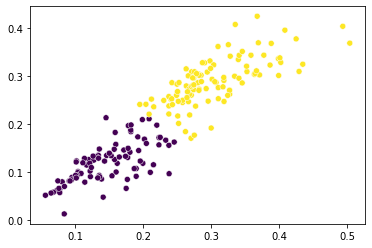

In [32]:
sns.scatterplot(x=X['inferred_threshold_white'].values,y=X['inferred_threshold_black'].values, c = kmeans.labels_)

In [33]:
df_KMeans['predicted_labels'] = kmeans.labels_
df_KMeans

,inferred_threshold_white,inferred_threshold_black,partisanship,predicted_labels
0,0.223550,0.171864,Democrat,0
1,0.238114,0.155822,Democrat,0
2,0.262494,0.184323,Democrat,1
3,0.233488,0.166497,Democrat,0
4,0.225318,0.172387,Democrat,0
...,...,...,...,...
189,0.076341,0.066042,Democrat,0
190,0.084414,0.070134,Democrat,0
191,0.101895,0.087679,Democrat,0
192,0.092732,0.081542,Democrat,0


In [35]:
df_KMeans['true_labels'] = [0 if party == 'Democrat' else 1 for party in df_KMeans['partisanship'].values]

<AxesSubplot:>

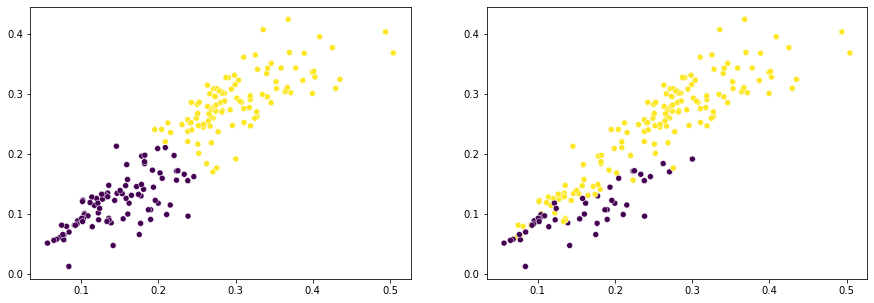

In [39]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))

sns.scatterplot(x=X['inferred_threshold_white'].values,y=X['inferred_threshold_black'].values, c = kmeans.labels_, ax=ax1)
sns.scatterplot(x=X['inferred_threshold_white'].values,y=X['inferred_threshold_black'].values, c = df_KMeans['true_labels'].values, ax=ax2)

In [40]:
err = (df_KMeans['true_labels'].values==df_KMeans['predicted_labels'].values)

In [43]:
error = np.sum(err)*100/len(err)

In [44]:
error

75.25773195876289